In [14]:
# Import required libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm
import random


In [15]:
# Define dataset path
open_eyes_path = "training_data/Open_Eyes"
closed_eyes_path = "training_data/Closed_Eyes"

# Initialize data arrays
X = []
y = []

# Load images from the 'Open Eyes' folder
for file in os.listdir(open_eyes_path):
    if file.endswith('.png'):  # Ensure it's a PNG file
        image_path = os.path.join(open_eyes_path, file)

        # Load image (already grayscale, no need for color conversion)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Resize image to 24x24 (if needed, adjust according to your model input size)
        image = cv2.resize(image, (24, 24))

        # Append the image and label (1 for open eyes)
        X.append(image)
        y.append(1)  # Open eyes = 1

# Load images from the 'Closed Eyes' folder
for file in os.listdir(closed_eyes_path):
    if file.endswith('.png'):  # Ensure it's a PNG file
        image_path = os.path.join(closed_eyes_path, file)

        # Load image (already grayscale, no need for color conversion)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Resize image to 24x24 (if needed, adjust according to your model input size)
        image = cv2.resize(image, (24, 24))

        # Append the image and label (0 for closed eyes)
        X.append(image)
        y.append(0)  # Closed eyes = 0

# Convert to NumPy arrays
X = np.array(X).reshape(-1, 24, 24, 1) / 255.0  # Normalize the image data
y = to_categorical(y, num_classes=2)  # One-hot encode labels (open=1, closed=0)

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Dataset loaded: {len(X)} samples (Training: {len(X_train)}, Test: {len(X_test)})")


Dataset loaded: 4000 samples (Training: 3200, Test: 800)


In [16]:
# Build a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(24, 24, 1)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),  # Dropout for regularization
    Dense(2, activation='softmax')  # 2 output classes: open and closed eyes
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()  # Display model summary


c:\Users\User\Desktop\BSCS\6th Semester\Computer Vision\CV project final\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 22, 22, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 9, 9, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 150,274 (587.01 KB)

 Trainable params: 150,274 (587.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.7780 - loss: 0.4644 - val_accuracy: 0.9762 - val_loss: 0.1109
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9686 - loss: 0.1036 - val_accuracy: 0.9737 - val_loss: 0.0739
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9896 - loss: 0.0407 - val_accuracy: 0.9862 - val_loss: 0.0280
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9923 - loss: 0.0261 - val_accuracy: 0.9862 - val_loss: 0.0335
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9934 - loss: 0.0236 - val_accuracy: 0.9962 - val_loss: 0.0152
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9947 - loss: 0.0183 - val_accuracy: 0.9975 - val_loss: 0.0138
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9983 - loss: 0.0081 - val_accuracy: 0.9962 - val_loss: 0.0088
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9996 - loss: 0.0043 - val_accu

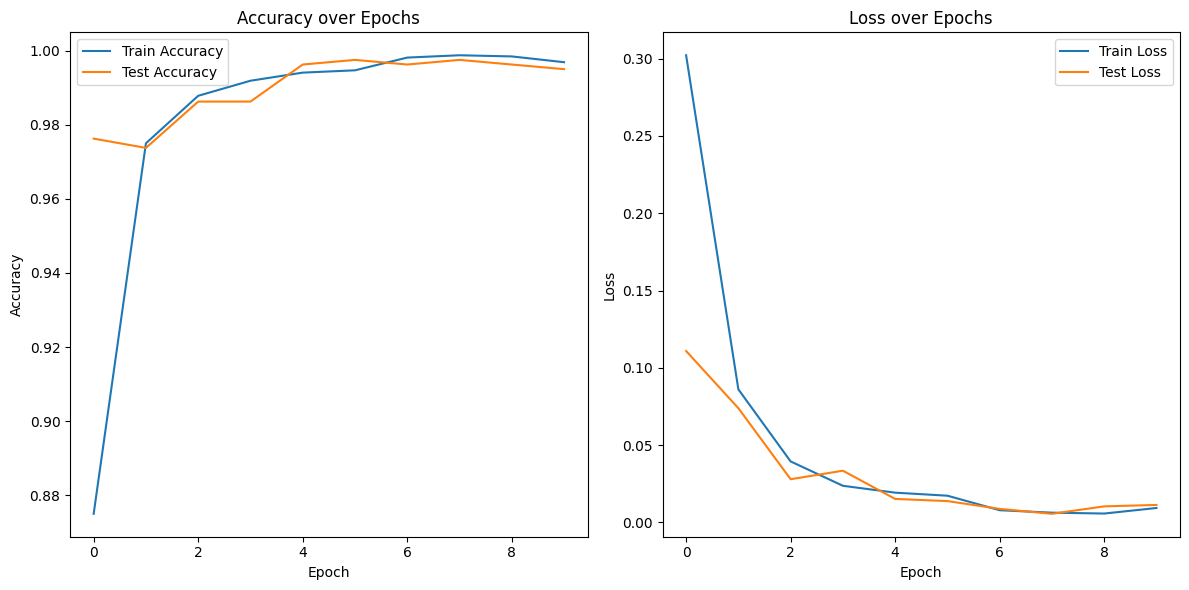

In [17]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plot training & validation accuracy/loss curves
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [18]:
model.save('drowsiness_model.h5')